#Tugas Besar Tahap 1 : Clustering

**Nama  : Marcello Rasel Hidayatullah** <br>
**NIM   : 1301184019** <br>
**Kelas : IF-42-12**

#**Import Library**

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import random
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Data from Excel**

In [10]:
# Gabung data train dan data test
path = "/content/drive/MyDrive/salju/salju_train.csv"
path2 = "/content/drive/MyDrive/salju/salju_test.csv"
df1 = pd.read_csv(path)
df2 = pd.read_csv(path2)

df = pd.concat([df1, df2], ignore_index=True)
#df.head()
#df.tail()

#**Pre Processing**

In [11]:
# Drop Kolom yang tidak dibutuhkan
df = df.drop(columns=['BersaljuBesok', 'BersaljuHariIni'])
df.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,1.0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0
1,2.0,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5
2,3.0,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6
3,4.0,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2
4,5.0,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1


Mengecek Missing Values

In [12]:
# Mengecek Nilai null
#df.info()
df.isnull().sum()

id                          18182
Tanggal                         0
KodeLokasi                      0
SuhuMin                      1287
SuhuMax                      1094
Hujan                        2818
Penguapan                   54880
SinarMatahari               61097
ArahAnginTerkencang          9025
KecepatanAnginTerkencang     8970
ArahAngin9am                 9231
ArahAngin3pm                 3693
KecepatanAngin9am            1551
KecepatanAngin3pm            2657
Kelembaban9am                2332
Kelembaban3pm                3922
Tekanan9am                  13192
Tekanan3pm                  13161
Awan9am                     48886
Awan3pm                     51927
Suhu9am                      1559
Suhu3pm                      3140
dtype: int64

Mengatasi Missing Values

In [13]:
df.fillna(df.median(), inplace=True)            # Nilai Numeric diisi dengan nilai median
df = df.fillna(df.mode().iloc[0])               # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

df.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
0,1.0,01/06/2014,C4,10.4,15.5,4.8,4.8,8.4,WSW,24.0,N,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,5.0,5.0,13.1,15.0
1,2.0,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,W,39.0,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5
2,3.0,16/02/2011,C46,18.2,32.0,0.0,4.8,8.4,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,1017.6,1015.2,5.0,5.0,23.8,29.6
3,4.0,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2
4,5.0,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1


Numerical

In [14]:
# Memilih Kolom yang berisi nilai Numerical
ndf = pd.DataFrame(columns = ['SuhuMin', 'SuhuMax', 'Hujan', 'Penguapan', 'SinarMatahari', 'KecepatanAngin3pm', 'Kelembaban3pm', 'Tekanan3pm', 'Awan3pm', 'Suhu3pm'])
ndf['SuhuMin'] = df['SuhuMin']
ndf['SuhuMax'] = df['SuhuMax']
ndf['Hujan'] = df['Hujan']
ndf['Penguapan'] = df['Penguapan']
ndf['SinarMatahari'] = df['SinarMatahari']
ndf['KecepatanAngin3pm'] = df['KecepatanAngin3pm']
ndf['Kelembaban3pm'] = df['Kelembaban3pm']
ndf['Tekanan3pm'] = df['Tekanan3pm']
ndf['Awan3pm'] = df['Awan3pm']
ndf['Suhu3pm'] = df['Suhu3pm']
ndf.head()

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAngin3pm,Kelembaban3pm,Tekanan3pm,Awan3pm,Suhu3pm
0,10.4,15.5,4.8,4.8,8.4,13.0,76.0,1018.5,5.0,15.0
1,9.0,17.0,8.0,2.6,7.4,20.0,61.0,1014.6,5.0,15.5
2,18.2,32.0,0.0,4.8,8.4,26.0,42.0,1015.2,5.0,29.6
3,7.3,24.5,0.0,8.4,10.4,19.0,17.0,1016.9,7.0,23.2
4,5.9,20.3,0.0,3.6,12.6,19.0,48.0,1014.7,6.0,18.1


Mengecek Outliers

In [15]:
# Fungsi menentukan batas atas dan bawah dengan Interquartille Range
def Outliers(x):
  q1 = x.quantile(0.25)
  q3 = x.quantile(0.75)
  iqr = q3 - q1
  low = q1 - (1.5*iqr)
  up = q3 + (1.5*iqr)

  return low, up

# Melihat batas bawah dan atas Outliers
smin_low, smin_up = Outliers(ndf['SuhuMin'])
smax_low, smax_up = Outliers(ndf['SuhuMax'])
hujan_low, hujan_up = Outliers(ndf['Hujan'])
penguapan_low, penguapan_up = Outliers(ndf['Penguapan'])
sm_low, sm_up = Outliers(ndf['SinarMatahari'])
kec3pm_low, kec3pm_up = Outliers(ndf['KecepatanAngin3pm'])
kel3pm_low, kel3pm_up = Outliers(ndf['Kelembaban3pm'])
tekanan_low, tekanan_up = Outliers(ndf['Tekanan3pm'])
awan3pm_low, awan3pm_up = Outliers(ndf['Awan3pm'])
s3pm_low, s3pm_up = Outliers(ndf['Suhu3pm'])

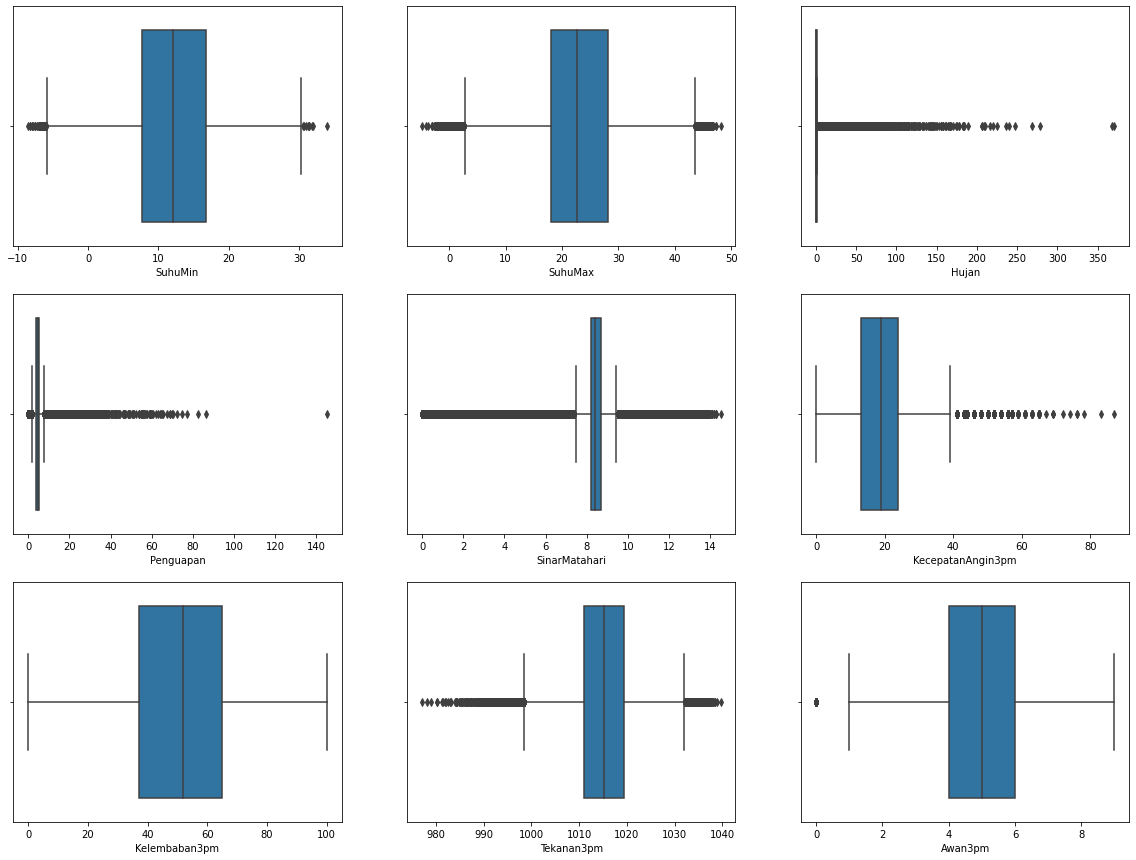

In [16]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))
for i, ax in zip(ndf.columns, axes.flat):
  sns.boxplot(x=ndf[i], ax=ax)
plt.show()

In [17]:
ndf.shape

(127277, 10)

Mengatasi Outliers

In [18]:
# Mengganti Nilai Outliers
for column in ndf.columns:
  ndf[column] = np.where((ndf[column] > smin_low) | (ndf[column] < smin_up), ndf[column], ndf[column].mean())

In [19]:
ndf.shape

(127277, 10)

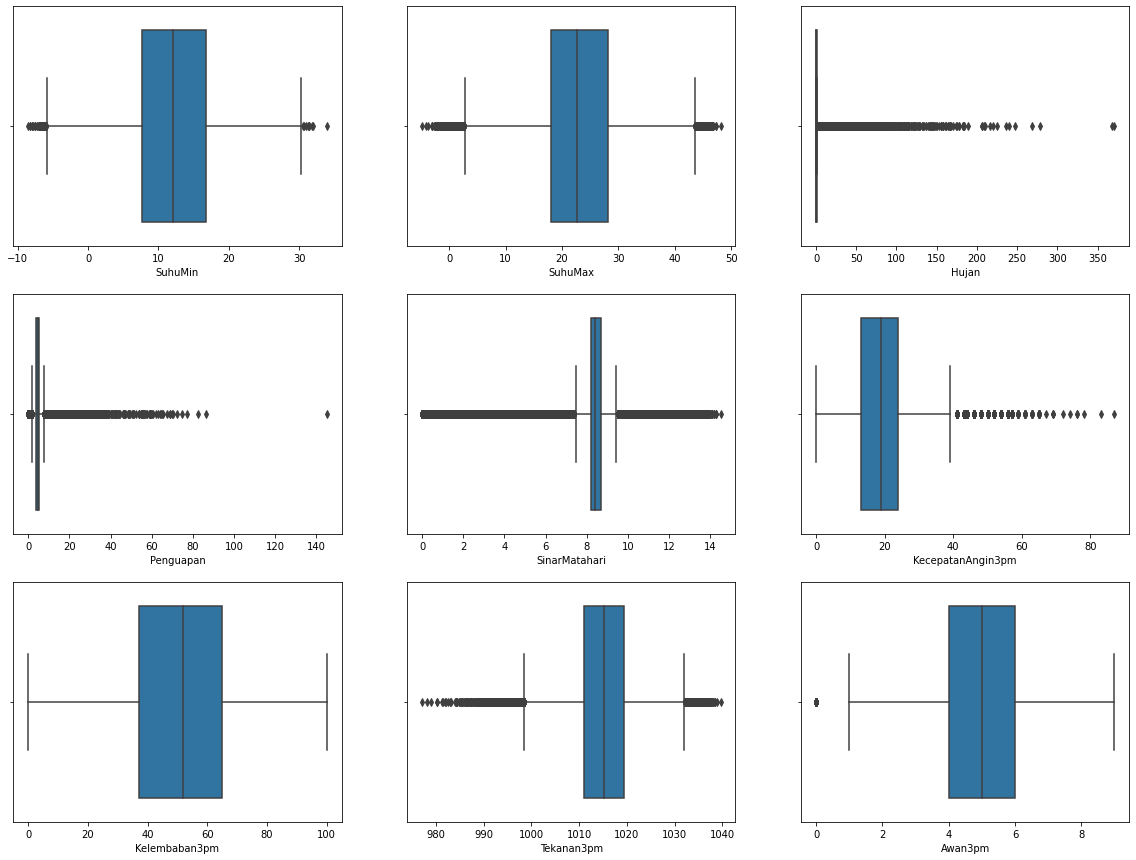

In [20]:
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(20, 15))
for i, ax in zip(ndf.columns, axes.flat):
  sns.boxplot(x=ndf[i], ax=ax)
plt.show()

Melihat Korelasi

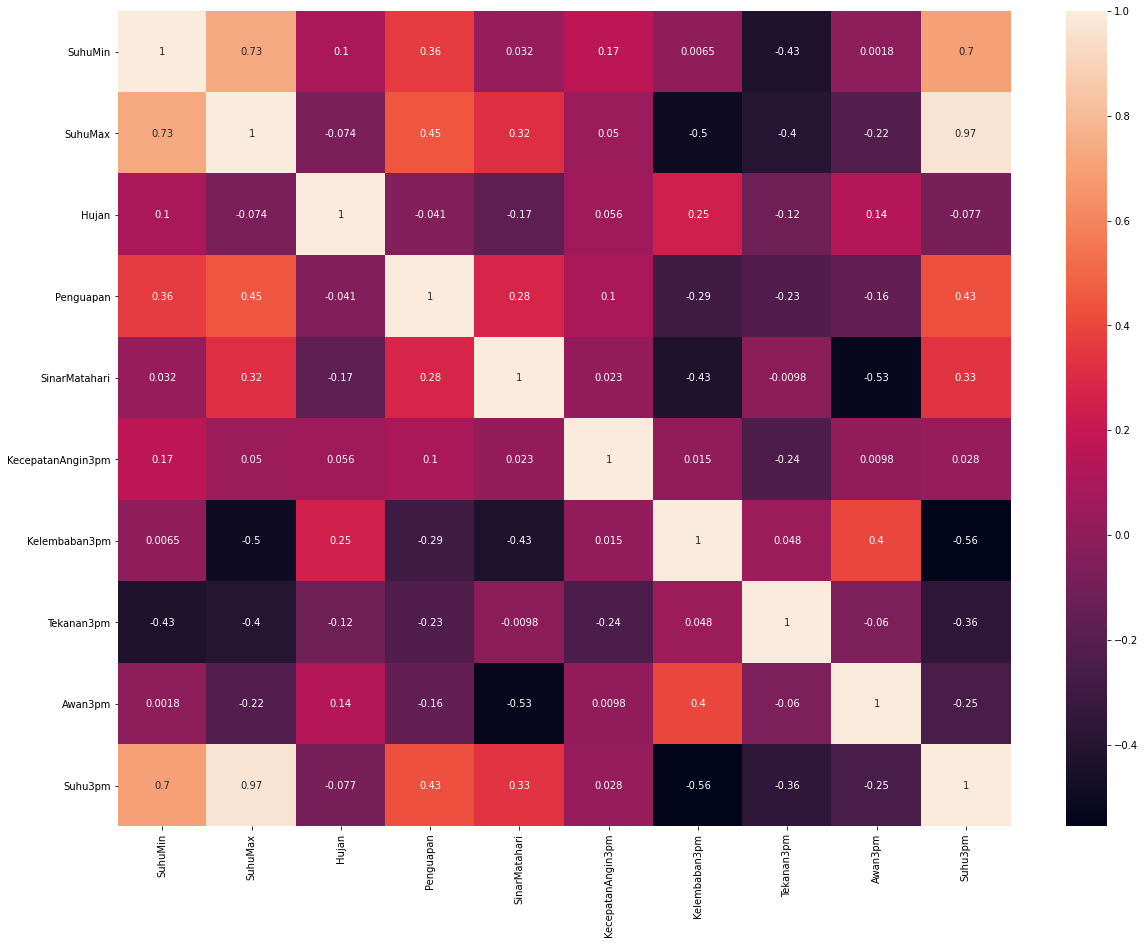

In [21]:
# Korelasi
corr = ndf.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True)

Normalisasi

In [22]:
columns_new = ndf.columns

In [23]:
# MinMax Scaler
scaler = MinMaxScaler()
norm_df = scaler.fit_transform(ndf)
norm_df_scalled = pd.DataFrame(norm_df, columns=columns_new)

norm_df_scalled

,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAngin3pm,Kelembaban3pm,Tekanan3pm,Awan3pm,Suhu3pm
0,0.445755,0.383743,0.012938,0.033103,0.579310,0.149425,0.76,0.6624,0.555556,0.391555
1,0.412736,0.412098,0.021563,0.017931,0.510345,0.229885,0.61,0.6000,0.555556,0.401152
2,0.629717,0.695652,0.000000,0.033103,0.579310,0.298851,0.42,0.6096,0.555556,0.671785
3,0.372642,0.553875,0.000000,0.057931,0.717241,0.218391,0.17,0.6368,0.777778,0.548944
4,0.339623,0.474480,0.000000,0.024828,0.868966,0.218391,0.48,0.6016,0.666667,0.451056
...,...,...,...,...,...,...,...,...,...,...
127272,0.384434,0.578450,0.000000,0.055172,0.910345,0.149425,0.21,0.5936,0.111111,0.564299
127273,0.492925,0.593573,0.000000,0.055172,0.800000,0.229885,0.25,0.6656,0.111111,0.596929
127274,0.358491,0.523629,0.000000,0.033103,0.579310,0.045977,0.35,0.6096,0.222222,0.525912
127275,0.495283,0.595463,0.000000,0.062069,0.744828,0.298851,0.45,0.6560,0.555556,0.591171


#**Clustering**

In [24]:
# Fungsi menghitung jarak menggunakan Euclidean
def Euclidean(data1, data2):
  return sum(((data1[i] - data2[i]) ** 2) for i in range(len(data1))) ** 0.5

In [25]:
# Fungsi Update Centroid
def update(centroid, cluster):
  for i in range(len(centroid)):
    cluster_filter = cluster.loc[cluster['Cluster'] == 'Cluster ' + str(i+1)]
    centroid[i] = cluster_filter.iloc[:,:-1].mean()
  return centroid

In [26]:
# Untuk mengecek posisi centroid lama
def check(a,b):
  cek = True
  for i in range(len(a)):
    for j in range(len(a[i])):
      if a[i][j] != b[i][j]:
        cek = False
        break
  return cek

In [27]:
# Fungsi KMeans
def kmeans(norm_df_scalled, k):
  clustering = norm_df_scalled.copy()
  clustering['Cluster'] = np.nan

# Memilih centroid secara random
  k_list = []
  for i in range(k):  
    k_list.append(norm_df_scalled.iloc[np.random.randint(0, norm_df_scalled.shape[0])])
   
  while True: 
    jarak_list = []
    for j in range(len(df)):  
      temp = k_list.copy()
      jarak = Euclidean(norm_df_scalled.iloc[j], k_list[0])
      clustering.loc[j, 'Cluster'] = 'Cluster 1' 
      jarak_list.append(jarak)

      for k in range(len(k_list) - 1):  # Menghitung jarak ke setiap centroid
        if jarak > Euclidean(norm_df_scalled.iloc[j], k_list[k+1]):
          jarak = Euclidean(norm_df_scalled.iloc[j], k_list[k+1])
          clustering.loc[j, 'Cluster'] = 'Cluster ' + str(k+2)
          jarak_list[j] = jarak

    k_list = update(k_list, clustering)

    if check(k_list, temp):
      break

  return(clustering, jarak_list)

Main Program

In [28]:
clust = []
jarak_list = []
for i in range(4):
  salju, jarak = kmeans(norm_df_scalled[['SuhuMax', 'Suhu3pm']], i+1)
  clust.append(salju)
  jarak_list.append(jarak)

In [29]:
salju

,SuhuMax,Suhu3pm,Cluster
0,0.383743,0.391555,Cluster 4
1,0.412098,0.401152,Cluster 4
2,0.695652,0.671785,Cluster 2
3,0.553875,0.548944,Cluster 1
4,0.474480,0.451056,Cluster 3
...,...,...,...
127272,0.578450,0.564299,Cluster 1
127273,0.593573,0.596929,Cluster 1
127274,0.523629,0.525912,Cluster 3
127275,0.595463,0.591171,Cluster 1


Plotting

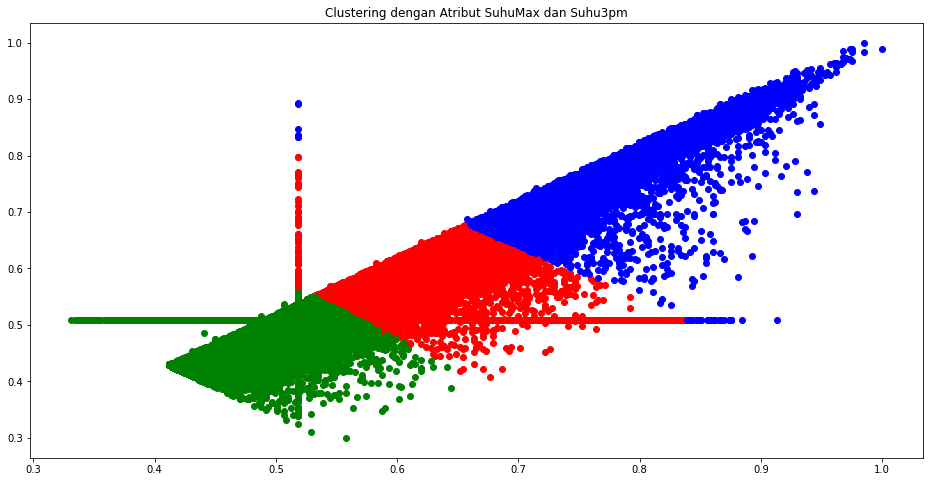

In [31]:
cluster1 = salju.loc[salju['Cluster'] == 'Cluster 1']
cluster2 = salju.loc[salju['Cluster'] == 'Cluster 2']
cluster3 = salju.loc[salju['Cluster'] == 'Cluster 3']

plt.figure(figsize=(16, 8))
plt.title('Clustering dengan Atribut SuhuMax dan Suhu3pm')
plt.scatter(cluster1['SuhuMax'], cluster1['Suhu3pm'], color='Red', label = 'Cluster 1')
plt.scatter(cluster2['SuhuMax'], cluster2['Suhu3pm'], color ='Blue', label = 'Cluster 2')
plt.scatter(cluster3['SuhuMax'], cluster3['Suhu3pm'], color = 'Green', label = 'Cluster 3')

#**Evaluasi**

In [32]:
# SSE
def sse(data):
  hasil = 0
  for i in range(len(data)):
    hasil = hasil+(data[i]**2)

  return hasil


In [33]:
# Menampilkan list nilai SSE
sse_list = []
k_list = []
for i in range(4):
  sse_list.append(sse(jarak_list[i]))
  k_list.append(i+1)

sse_list

[4479.233860543132, 1549.5573853600802, 844.4466109320061, 556.5878112470695]

<function matplotlib.pyplot.show>

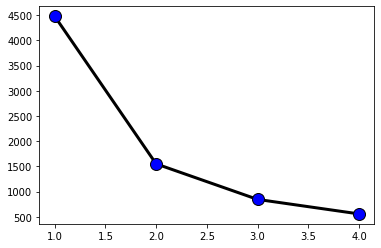

In [34]:
plt.plot(k_list, sse_list, color='black', linewidth = 3, marker='o', markerfacecolor='Blue', markersize=12)
plt.show